##### Imports

In [1]:
import os
import pandas as pd
import csv

import seaborn as sns
import matplotlib.pyplot as plt
from statannot import add_stat_annotation

from temp_funcs import path, csv_path, path_jem, \
read_file, merge_dataframes, drop_cols, drop_nans, filter_date_range, \
filter_df, create_container_col, create_cond_df, create_container_df

from IPython.display import HTML #Display tables

In [2]:
sns.set(context = "notebook", style = "ticks", font="verdana", font_scale = 1.5)
pd.set_option("display.max_colwidth",150) #Expands the number of characters shown in the columns
pd.set_option('display.max_columns', None)

In [3]:
fields_morph = ["name", "id", "specimen_id",
                "vrest", "ri", "sag", "tau", "upstroke_downstroke_ratio_long_square", 
                "latency", "f_i_curve_slope"]
path_morph = os.path.join(csv_path, "ephys_mIVSCC_MET.csv")
morph = read_file(path_morph, fields_morph)
morph = drop_nans(morph, ["specimen_id"])
plot_path = os.path.join(path, "plot/short_tall_plot/")

INFO:temp_funcs:Read file in as a pandas dataframe
INFO:temp_funcs:Dropped NaNs from these columns: ['specimen_id']


In [4]:
path_list = os.path.join(csv_path, "short_tall_morph.csv")
morph_list = read_file(path_list)

INFO:temp_funcs:Read file in as a pandas dataframe


In [5]:
morph_list = read_file(path_list)

INFO:temp_funcs:Read file in as a pandas dataframe


In [6]:
morph_list["Morpho type"].unique()

array(['Short', 'Tall'], dtype=object)

In [7]:
morph_list["Projection Class"].unique()

array(['IT', 'CT', nan], dtype=object)

In [8]:
len(morph_list)

188

In [9]:
merged = merge_dataframes(morph, morph_list, "specimen_id", "Cell Specimen Id", "inner")

INFO:temp_funcs:Merged two pandas dataframe into one dataframe


In [10]:
len(merged)

176

##### Function

In [11]:
def create_proportion_table(df, index_col, val_col):
    df["group_count"] = df.groupby([index_col, val_col])[val_col].transform("count")
    df["group_total"] = df.groupby(index_col)[val_col].transform("count")
    df["proportion"] = df["group_count"] / df["group_total"] * 100
    return df

##### Plots

In [12]:
v_colors={"Short": "#ef3b2c", "Tall": "#4292c6"}
n_colors={"CT": "#ef3b2c", "IT": "#4292c6"}

##### IT vs CT

In [13]:
p_table1 = create_proportion_table(merged, "Projection Class", "Morpho type")
count_table1 = pd.pivot_table(p_table1, values="group_count", index=["Projection Class"], columns="Morpho type", fill_value=0)
count_table1
#HTML(count_table1.to_html(classes="table table-striped"))

Morpho type,Short,Tall
Projection Class,,
CT,30,72
IT,50,18


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

CT v.s. IT: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.690e-03 U_stat=4.412e+03
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

CT v.s. IT: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.849e-05 U_stat=4.710e+03
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

CT v.s. IT: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.695e-25 U_stat=2.320e+02
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

CT v.s. IT: Ma

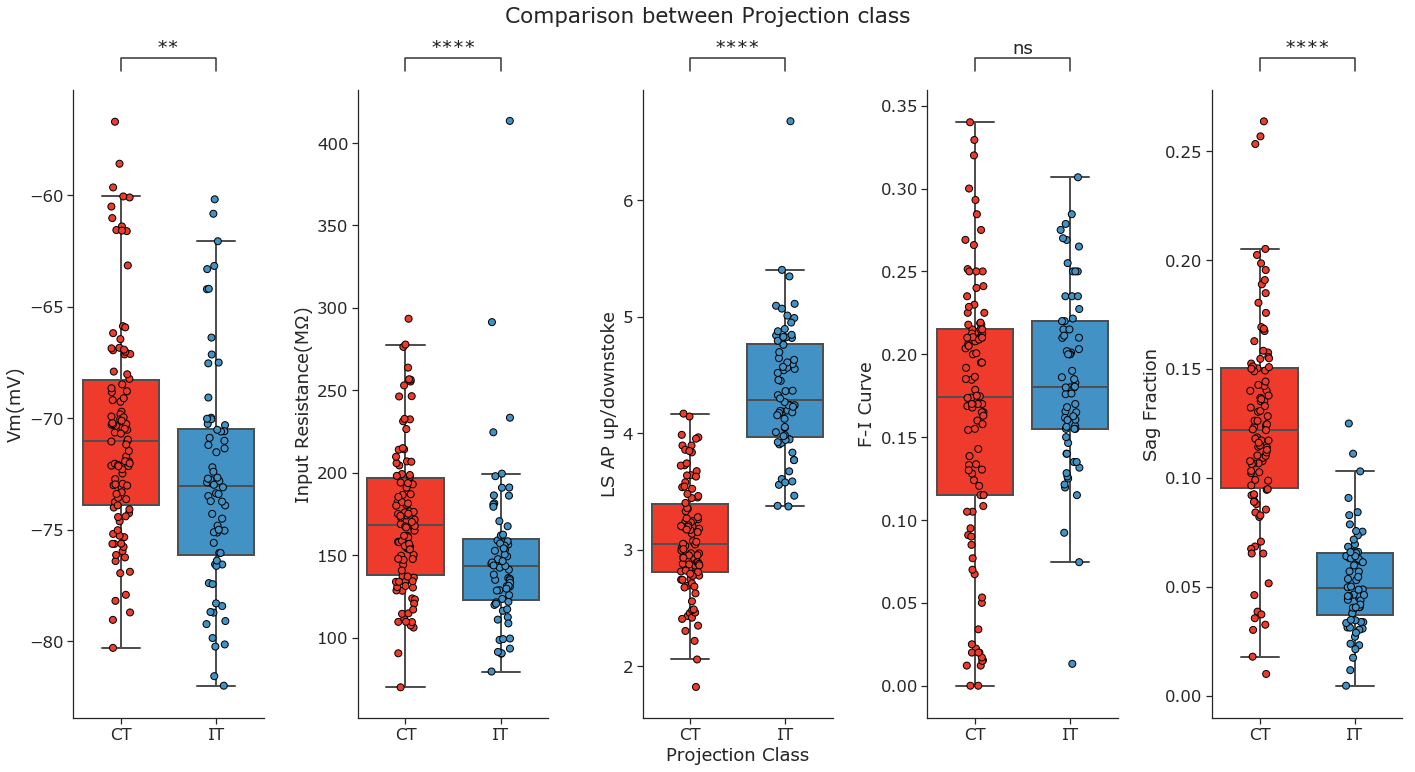

In [14]:
f, axes = plt.subplots(figsize=(20,10), nrows=1, ncols=5, sharex=True)

x="Projection Class"
y0="vrest"
y1="ri"
y2="upstroke_downstroke_ratio_long_square"
y3="f_i_curve_slope"
y4="sag"
order=["CT", "IT"]
bp_list=[(("CT", "IT"))]

#boxplots
ax0 = sns.boxplot(x=x, y=y0, data=merged, order=order, palette=n_colors,
                  saturation=1, linewidth=2, showfliers=False, ax=axes[0])
ax1 = sns.boxplot(x=x, y=y1, data=merged, order=order, palette=n_colors,
                  saturation=1, linewidth=2, showfliers=False, ax=axes[1])
ax2 = sns.boxplot(x=x, y=y2, data=merged, order=order, palette=n_colors,
                  saturation=1, linewidth=2, showfliers=False, ax=axes[2])
ax3 = sns.boxplot(x=x, y=y3, data=merged, order=order, palette=n_colors,
                  saturation=1, linewidth=2, showfliers=False, ax=axes[3])
ax4 = sns.boxplot(x=x, y=y4, data=merged, order=order, palette=n_colors,
                  saturation=1, linewidth=2, showfliers=False, ax=axes[4])

#stripplots
ax0 = sns.stripplot(x=x, y=y0, data=merged, order=order,
                    palette=n_colors, dodge=True, size=7, edgecolor="black", linewidth=1, ax=axes[0])
ax1 = sns.stripplot(x=x, y=y1, data=merged, order=order,
                    palette=n_colors, dodge=True, size=7, edgecolor="black", linewidth=1, ax=axes[1])
ax2 = sns.stripplot(x=x, y=y2, data=merged, order=order,
                    palette=n_colors, dodge=True, size=7, edgecolor="black", linewidth=1, ax=axes[2])
ax3 = sns.stripplot(x=x, y=y3, data=merged, order=order,
                    palette=n_colors, dodge=True, size=7, edgecolor="black", linewidth=1, ax=axes[3])
ax4 = sns.stripplot(x=x, y=y4, data=merged, order=order,
                    palette=n_colors, dodge=True, size=7, edgecolor="black", linewidth=1, ax=axes[4])

#t-tests
add_stat_annotation(ax=ax0, x=x, y=y0, data=merged, order=order, box_pairs=bp_list, test="Mann-Whitney", text_format="star", loc="outside")
add_stat_annotation(ax=ax1, x=x, y=y1, data=merged, order=order, box_pairs=bp_list, test="Mann-Whitney", text_format="star", loc="outside")
add_stat_annotation(ax=ax2, x=x, y=y2, data=merged, order=order, box_pairs=bp_list, test="Mann-Whitney", text_format="star", loc="outside")
add_stat_annotation(ax=ax3, x=x, y=y3, data=merged, order=order, box_pairs=bp_list, test="Mann-Whitney", text_format="star", loc="outside")
add_stat_annotation(ax=ax4, x=x, y=y4, data=merged, order=order, box_pairs=bp_list, test="Mann-Whitney", text_format="star", loc="outside")

#Set x-axis labels
ax0.set_xlabel("")
ax1.set_xlabel("")
ax2.set_xlabel("Projection Class")
ax3.set_xlabel("")
ax4.set_xlabel("")

#Set y-axis labels
ax0.set_ylabel("Vm(mV)")
ax1.set_ylabel("Input Resistance(MΩ)")
ax2.set_ylabel("LS AP up/downstoke")
ax3.set_ylabel("F-I Curve")
ax4.set_ylabel("Sag Fraction")

sns.despine(bottom=False, right=True)
f.tight_layout()
plt.suptitle("Comparison between Projection class", y=1.08)
plt.savefig(plot_path + "only_projection_class.jpeg", bbox_inches="tight")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

IT_Short v.s. IT_Tall: t-test independent samples with Bonferroni correction, P_val=8.699e-01 stat=-7.855e-01
CT_Short v.s. CT_Tall: t-test independent samples with Bonferroni correction, P_val=8.487e-01 stat=8.021e-01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

IT_Short v.s. IT_Tall: t-test independent samples with Bonferroni correction, P_val=7.269e-02 stat=-2.137e+00
CT_Short v.s. CT_Tall: t-test independent samples with Bonferroni correction, P_val=5.128e-01 stat=1.141e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

IT_Short v.s. IT_Tall: t-test independent samples with Bonferroni corr

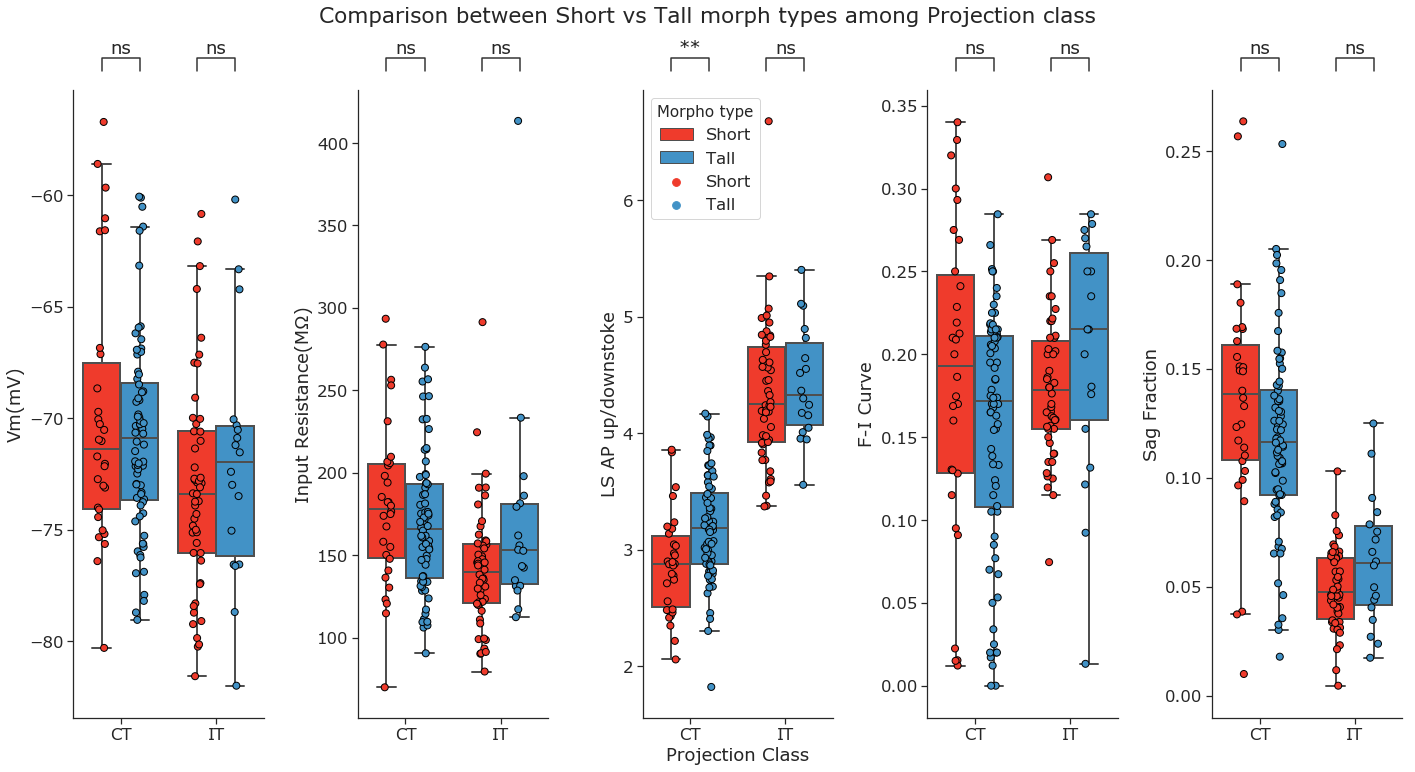

In [15]:
f, axes = plt.subplots(figsize=(20,10), nrows=1, ncols=5, sharex=True)

x="Projection Class"
y0="vrest"
y1="ri"
y2="upstroke_downstroke_ratio_long_square"
y3="f_i_curve_slope"
y4="sag"
hue="Morpho type"
order=["CT", "IT"]
bp_list=[(("CT", "Short"), ("CT", "Tall")),
         (("IT", "Short"), ("IT", "Tall"))]


#boxplots
ax0 = sns.boxplot(x=x, y=y0, data=merged, order=order, hue=hue, hue_order=v_colors, palette=v_colors,
                  saturation=1, linewidth=2, showfliers=False, ax=axes[0])
ax1 = sns.boxplot(x=x, y=y1, data=merged, order=order, hue=hue, hue_order=v_colors, palette=v_colors,
                  saturation=1, linewidth=2, showfliers=False, ax=axes[1])
ax2 = sns.boxplot(x=x, y=y2, data=merged, order=order, hue=hue, hue_order=v_colors, palette=v_colors,
                  saturation=1, linewidth=2, showfliers=False, ax=axes[2])
ax3 = sns.boxplot(x=x, y=y3, data=merged, order=order, hue=hue, hue_order=v_colors, palette=v_colors,
                  saturation=1, linewidth=2, showfliers=False, ax=axes[3])
ax4 = sns.boxplot(x=x, y=y4, data=merged, order=order, hue=hue, hue_order=v_colors, palette=v_colors,
                  saturation=1, linewidth=2, showfliers=False, ax=axes[4])

#stripplots
ax0 = sns.stripplot(x=x, y=y0, data=merged, order=order, hue=hue, hue_order=v_colors, 
                    palette=v_colors, dodge=True, size=7, edgecolor="black", linewidth=1, ax=axes[0])
ax1 = sns.stripplot(x=x, y=y1, data=merged, order=order, hue=hue, hue_order=v_colors,
                    palette=v_colors, dodge=True, size=7, edgecolor="black", linewidth=1, ax=axes[1])
ax2 = sns.stripplot(x=x, y=y2, data=merged, order=order, hue=hue, hue_order=v_colors,
                    palette=v_colors, dodge=True, size=7, edgecolor="black", linewidth=1, ax=axes[2])
ax3 = sns.stripplot(x=x, y=y3, data=merged, order=order, hue=hue, hue_order=v_colors,
                    palette=v_colors, dodge=True, size=7, edgecolor="black", linewidth=1, ax=axes[3])
ax4 = sns.stripplot(x=x, y=y4, data=merged, order=order, hue=hue, hue_order=v_colors,
                    palette=v_colors, dodge=True, size=7, edgecolor="black", linewidth=1, ax=axes[4])

#t-tests
add_stat_annotation(ax=ax0, x=x, y=y0, data=merged, order=order, hue=hue, box_pairs=bp_list, test="t-test_ind", text_format="star", loc="outside")
add_stat_annotation(ax=ax1, x=x, y=y1, data=merged, order=order, hue=hue, box_pairs=bp_list, test="t-test_ind", text_format="star", loc="outside")
add_stat_annotation(ax=ax2, x=x, y=y2, data=merged, order=order, hue=hue, box_pairs=bp_list, test="t-test_ind", text_format="star", loc="outside")
add_stat_annotation(ax=ax3, x=x, y=y3, data=merged, order=order, hue=hue, box_pairs=bp_list, test="t-test_ind", text_format="star", loc="outside")
add_stat_annotation(ax=ax4, x=x, y=y4, data=merged, order=order, hue=hue, box_pairs=bp_list, test="t-test_ind", text_format="star", loc="outside")

#Set x-axis labels
ax0.set_xlabel("")
ax1.set_xlabel("")
ax2.set_xlabel("Projection Class")
ax3.set_xlabel("")
ax4.set_xlabel("")

#Set y-axis labels
ax0.set_ylabel("Vm(mV)")
ax1.set_ylabel("Input Resistance(MΩ)")
ax2.set_ylabel("LS AP up/downstoke")
ax3.set_ylabel("F-I Curve")
ax4.set_ylabel("Sag Fraction")

#Remove legends
ax0.get_legend().remove()
ax1.get_legend().remove()
#ax2.get_legend().remove()
ax3.get_legend().remove()
ax4.get_legend().remove()

sns.despine(bottom=False, right=True)
f.tight_layout()
plt.suptitle("Comparison between Short vs Tall morph types among Projection class", y=1.08)
plt.savefig(plot_path + "projection_class.jpeg", bbox_inches="tight")

##### Ttypes Plot

In [16]:
short_ttypes = merged[merged["Morpho type"] == "Short"]
tall_ttypes = merged[merged["Morpho type"] == "Tall"]

In [17]:
def return_subclass_list(df1=short_ttypes, df2=tall_ttypes, num=5):
    """Returns a subclass list with datapoints higher than "specified number
    Parameters:
        new_region_df:
        visp_region_df:
    Returns:
        sub_list:
    """
    
    short_list = list()
    tall_list = list()
    
    for n in df1["VISp Tree Mapping"].unique():
        value = df1[df1["VISp Tree Mapping"] == n]["vrest"].count() >= 5
        if value == True:
            short_list.append(n)
    
    for n in df2["VISp Tree Mapping"].unique():
        value = df2[df2["VISp Tree Mapping"] == n]["vrest"].count() >= 5
        if value == True:
            tall_list.append(n)

    ttype_list = sorted(list(set(short_list) & set(tall_list)))
    return ttype_list

In [18]:
ttype_list = return_subclass_list()
ttype_list

['L6 CT VISp Ctxn3 Brinp3', 'L6 CT VISp Ctxn3 Sla', 'L6 IT VISp Col18a1']

In [19]:
ttypes = merged[merged["VISp Tree Mapping"].isin(ttype_list)]
ttypes.sort_values("VISp Tree Mapping", inplace=True)
len(ttypes)

C:\Users\kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


119

In [20]:
p_table2 = create_proportion_table(ttypes, "VISp Tree Mapping", "Morpho type")
count_table2 = pd.pivot_table(p_table2, values="group_count", index=["VISp Tree Mapping"], columns="Morpho type", fill_value=0)
count_table2
#HTML(count_table2.to_html(classes="table table-striped"))

C:\Users\kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

Morpho type,Short,Tall
VISp Tree Mapping,,
L6 CT VISp Ctxn3 Brinp3,18,27
L6 CT VISp Ctxn3 Sla,5,28
L6 IT VISp Col18a1,31,10


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

L6 CT VISp Ctxn3 Sla_Tall v.s. L6 CT VISp Ctxn3 Sla_Short: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-1.591e-01
L6 CT VISp Ctxn3 Brinp3_Tall v.s. L6 CT VISp Ctxn3 Brinp3_Short: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=6.779e-01
L6 IT VISp Col18a1_Tall v.s. L6 IT VISp Col18a1_Short: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-6.949e-01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

L6 CT VISp Ctxn3 Sla_Tall v.s. L6 CT VISp Ctxn3 Sla_Short: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=8.668e-01
L6 CT VISp Ctxn3 Brinp3_Tall v.s. L6 CT VISp Ctxn3 Brinp3_Short: t-test independent samp

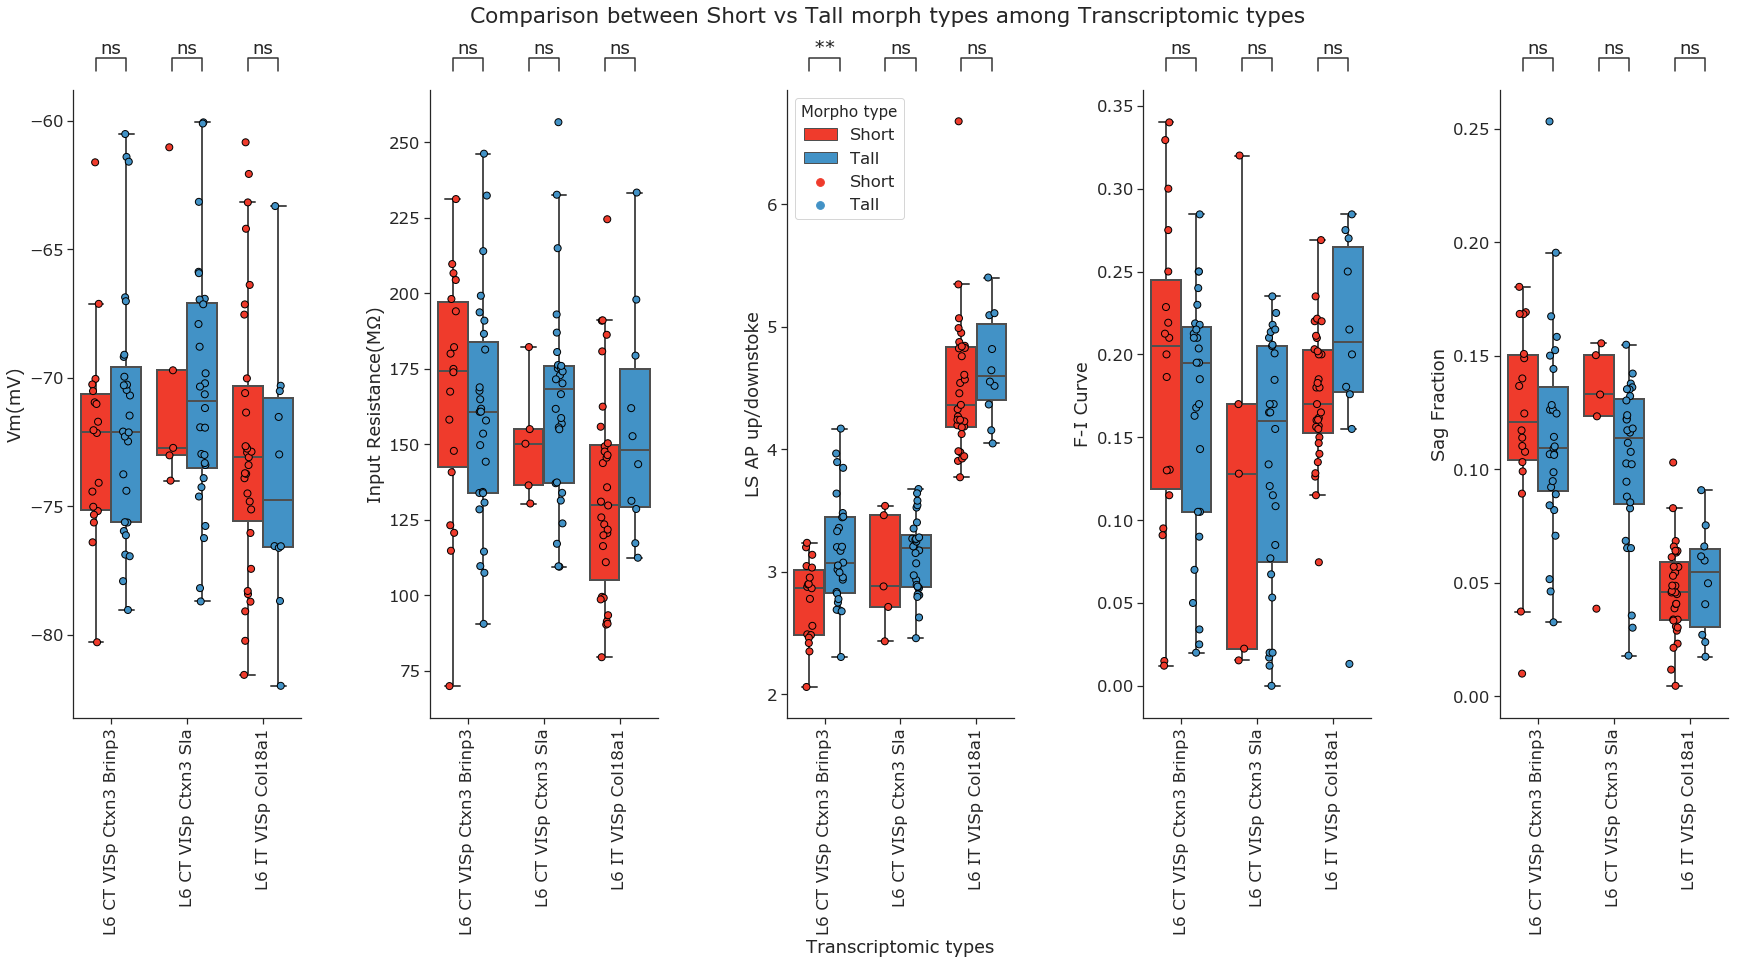

In [21]:
f, axes = plt.subplots(figsize=(25,10), nrows=1, ncols=5, sharex=True)

x="VISp Tree Mapping"
y0="vrest"
y1="ri"
y2="upstroke_downstroke_ratio_long_square"
y3="f_i_curve_slope"
y4="sag"
hue="Morpho type"
bp_list=[(("L6 CT VISp Ctxn3 Brinp3", "Short"), ("L6 CT VISp Ctxn3 Brinp3", "Tall")),
         (("L6 CT VISp Ctxn3 Sla", "Short"), ("L6 CT VISp Ctxn3 Sla", "Tall")),
         (("L6 IT VISp Col18a1", "Short"), ("L6 IT VISp Col18a1", "Tall"))]

#boxplots
ax0 = sns.boxplot(x=x, y=y0, data=ttypes, hue=hue, hue_order=v_colors, palette=v_colors, 
                  saturation=1, linewidth=2, showfliers=False, ax=axes[0])
ax1 = sns.boxplot(x=x, y=y1, data=ttypes, hue=hue, hue_order=v_colors, palette=v_colors,
                  saturation=1, linewidth=2, showfliers=False, ax=axes[1])
ax2 = sns.boxplot(x=x, y=y2, data=ttypes, hue=hue, hue_order=v_colors, palette=v_colors,
                  saturation=1, linewidth=2, showfliers=False, ax=axes[2])
ax3 = sns.boxplot(x=x, y=y3, data=ttypes, hue=hue, hue_order=v_colors, palette=v_colors,
                  saturation=1, linewidth=2, showfliers=False, ax=axes[3])
ax4 = sns.boxplot(x=x, y=y4, data=ttypes, hue=hue, hue_order=v_colors, palette=v_colors,
                  saturation=1, linewidth=2, showfliers=False, ax=axes[4])

#stripplots
ax0 = sns.stripplot(x=x, y=y0, data=ttypes, hue=hue, hue_order=v_colors, palette=v_colors, 
                    dodge=True, size=7, edgecolor="black", linewidth=1, ax=axes[0])
ax1 = sns.stripplot(x=x, y=y1, data=ttypes, hue=hue, hue_order=v_colors, palette=v_colors, 
                    dodge=True, size=7, edgecolor="black", linewidth=1, ax=axes[1])
ax2 = sns.stripplot(x=x, y=y2, data=ttypes, hue=hue, hue_order=v_colors, palette=v_colors, 
                    dodge=True, size=7, edgecolor="black", linewidth=1, ax=axes[2])
ax3 = sns.stripplot(x=x, y=y3, data=ttypes, hue=hue, hue_order=v_colors, palette=v_colors, 
                    dodge=True, size=7, edgecolor="black", linewidth=1, ax=axes[3])
ax4 = sns.stripplot(x=x, y=y4, data=ttypes, hue=hue, hue_order=v_colors, palette=v_colors, 
                    dodge=True, size=7, edgecolor="black", linewidth=1, ax=axes[4])

#t-tests
add_stat_annotation(ax=ax0, x=x, y=y0, data=ttypes, hue=hue, box_pairs=bp_list, test="t-test_ind", text_format="star", loc="outside")
add_stat_annotation(ax=ax1, x=x, y=y1, data=ttypes, hue=hue, box_pairs=bp_list, test="t-test_ind", text_format="star", loc="outside")
add_stat_annotation(ax=ax2, x=x, y=y2, data=ttypes, hue=hue, box_pairs=bp_list, test="t-test_ind", text_format="star", loc="outside")
add_stat_annotation(ax=ax3, x=x, y=y3, data=ttypes, hue=hue, box_pairs=bp_list, test="t-test_ind", text_format="star", loc="outside")
add_stat_annotation(ax=ax4, x=x, y=y4, data=ttypes, hue=hue, box_pairs=bp_list, test="t-test_ind", text_format="star", loc="outside")

#Set x-axis labels
ax0.set_xlabel("")
ax1.set_xlabel("")
ax2.set_xlabel("Transcriptomic types")
ax3.set_xlabel("")
ax4.set_xlabel("")

#Set y-axis labels
ax0.set_ylabel("Vm(mV)")
ax1.set_ylabel("Input Resistance(MΩ)")
ax2.set_ylabel("LS AP up/downstoke")
ax3.set_ylabel("F-I Curve")
ax4.set_ylabel("Sag Fraction")

#Remove legends
ax0.get_legend().remove()
ax1.get_legend().remove()
#ax2.get_legend().remove()
ax3.get_legend().remove()
ax4.get_legend().remove()


sns.despine(bottom=False, right=True)
f.tight_layout()
plt.suptitle("Comparison between Short vs Tall morph types among Transcriptomic types", y=1.08)
for ax in f.axes:
    ax.tick_params(axis="x", labelrotation=90)
plt.savefig(plot_path + "ttypes.jpeg", bbox_inches="tight")